In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
np.random.seed(42)
tf.random.set_seed(42)



In [25]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [27]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),

    keras.layers.Dense(128, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(1)
])

In [28]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    loss="mse",
    optimizer=optimizer,
    metrics=["mae"]
)


In [29]:

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    factor=0.5,
    patience=5
)


In [30]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 3.9317 - mae: 1.5320 - val_loss: 0.9414 - val_mae: 0.5636 - learning_rate: 0.0010
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0384 - mae: 0.7361 - val_loss: 0.6225 - val_mae: 0.4801 - learning_rate: 0.0010
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7956 - mae: 0.6249 - val_loss: 0.5874 - val_mae: 0.4729 - learning_rate: 0.0010
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6597 - mae: 0.5587 - val_loss: 0.5779 - val_mae: 0.4675 - learning_rate: 0.0010
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6209 - mae: 0.5383 - val_loss: 0.5157 - val_mae: 0.4618 - learning_rate: 0.0010
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5751 - mae: 0.5143 - val_loss: 0.5491 - val_mae: 0.4642 - learning_rate: 0.0010
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5514 - mae: 0.4991 - val_loss: 0.4930 - val_mae: 0.4591 - learning_rate: 0.001

In [31]:
mse_test, mae_test = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("\n📊 Final Evaluation:")
print("Test MSE:", mse_test)
print("Test MAE:", mae_test)
print("R2 Score:", r2)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3086 - mae: 0.3759
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

📊 Final Evaluation:
Test MSE: 0.3164216876029968
Test MAE: 0.375886470079422
R2 Score: 0.7711115278936005


In [32]:
model.save("california_housing_regressor.keras")

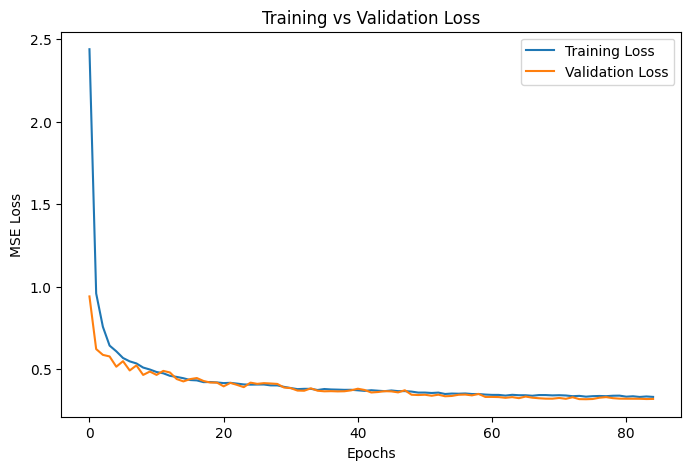

In [33]:

plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()